![example](images/director_shot.jpeg)

# Project Title

**Authors:** Madeleine Reiser
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [86]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import json
import requests
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [87]:
#load data 
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
imdb_title_basics = pd.read_csv('imdb.title.basics.csv.gz')
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

In [88]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [89]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [90]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [229]:
bom_movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           3387 non-null   object 
 1   Studio          3382 non-null   object 
 2   Domestic Gross  3359 non-null   float64
 3   Foreign Gross   2037 non-null   object 
 4   BOM Year        3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [92]:
bom_movie_gross.describe()


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [93]:
#Join imdb_title_basics and imdb_title_ratings 
imdb_ratings_joined = imdb_title_basics.merge(imdb_title_ratings, on = 'tconst',  how = 'outer')
imdb_ratings_joined.sort_values(by = 'start_year', ascending = False)
#data begins at 2010 and goes up to 2115, limit year to 2010-2018


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama,NaN,NaN
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy",NaN,NaN
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy,NaN,NaN
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",NaN,NaN
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy",NaN,NaN
...,...,...,...,...,...,...,...,...
74712,tt4264626,Civil War Life: Shot to Pieces,Civil War Life: Shot to Pieces,2010,79.0,Documentary,5.7,6.0
14471,tt1716746,Heinrich Kieber - Datendieb,Heinrich Kieber - Datendieb,2010,52.0,Documentary,7.7,6.0
74692,tt4263706,Mushrooms of America,Mushrooms of America,2010,46.0,"Adventure,Comedy,Documentary",NaN,NaN
118065,tt7059624,Zamana,Zamana,2010,140.0,Drama,NaN,NaN


In [94]:
imdb_ratings_joined.columns = ['tconst', 'Title', 'Original Title', 
                               'IMDB Year', 'Runtime (in minutes)', 
                              'Genres', 'Average Rating', 'Number of Votes']
imdb_ratings_joined.sort_values(by = 'IMDB Year')

,tconst,Title,Original Title,IMDB Year,Runtime (in minutes),Genres,Average Rating,Number of Votes
9599,tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,NaN,Comedy,NaN,NaN
43264,tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61.0,Music,6.9,17.0
11550,tt1634300,Role/Play,Role/Play,2010,85.0,"Drama,Romance",5.0,894.0
11551,tt1634332,Johan1,Johan Primero,2010,78.0,"Comedy,Drama,Romance",7.1,124.0
11552,tt1634334,Hands Up,Les mains en l'air,2010,90.0,Drama,6.2,271.0
...,...,...,...,...,...,...,...,...
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,NaN,NaN,NaN
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",NaN,NaN
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy,NaN,NaN
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy",NaN,NaN


In [231]:
#get relevant years (2010-2018) 
imdb_ratings_joined2010_2018 = imdb_ratings_joined.loc[imdb_ratings_joined['IMDB Year'] <= 2018]
imdb_ratings_joined2010_2018.sort_values(by = 'IMDB Year', ascending = False)
imdb_ratings_joined2010_2018.sort_values(by = 'Average Rating', ascending = False)

#drop rows where averagerating is NaN
#maybe drop rows with no votes????
rating_na_dropped = imdb_ratings_joined2010_2018[imdb_ratings_joined2010_2018['Average Rating'].notna()]
rating_na_dropped.sort_values(by = 'Average Rating', ascending = False).head(30)
#top rated movies are documentaries, but not many votes
rating_na_dropped.sort_values(by = 'Number of Votes', ascending = False).head(30)
#most rated movies are action 
rating_na_dropped['Genres'].value_counts().head(10)
#most common genre is drama


Drama                   11220
Documentary              9980
Comedy                   5400
Horror                   2617
Comedy,Drama             2510
Thriller                 1478
Drama,Romance            1473
Comedy,Romance           1195
Comedy,Drama,Romance     1186
Horror,Thriller           966
Name: Genres, dtype: int64

In [232]:
#limit average rating to 8 or better
rating_na_dropped.loc[rating_na_dropped['Average Rating'] > 8]
imdb_8_or_better = rating_na_dropped.loc[rating_na_dropped['Average Rating'] > 8]
#genres where rating was better than an 8
imdb_8_or_better['Genres'].value_counts().head(10)

#conclusion: Documentaries are the most frequent genre with ratings better than an 8


Documentary                      2409
Drama                            1068
Comedy                            353
Comedy,Drama                      192
Documentary,Music                 177
Documentary,Drama                 145
Biography,Documentary             133
Biography,Documentary,History     126
Documentary,History               121
Biography,Documentary,Drama       108
Name: Genres, dtype: int64

In [233]:
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
bom_movie_gross.sort_values(by='year', ascending=False)
bom_movie_gross.sort_values(by='domestic_gross', ascending=False).head(30)
bom_movie_gross.info()
#last year is 2018
#includes studio
#foreign_gross is an object
bom_movie_gross.columns = ['Title', 'Studio', 'Domestic Gross', 
                        'Foreign Gross', 'BOM Year']
bom_movie_gross

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,Title,Studio,Domestic Gross,Foreign Gross,BOM Year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [97]:
#maybe try to join bom-movie-gross 
#with the joined IMDB ratings by title now that 
#the IMDB table is refined? 
alljoined = bom_movie_gross.merge(rating_na_dropped, on = 'Title',  how = 'inner')
alljoined
#sort by # votes, gives best idea of rating
alljoined.sort_values(by = 'Domestic Gross', ascending = False)
#conclusion: highest grossing films are franchises and sequels 

#dropping BOM year because it has the least entries and most of 
#the data is from IMDB 
alljoined.drop_duplicates()
alljoined.drop(['BOM Year'], axis='columns', inplace=True)
alljoined.info()
#maybe try average rating per genre? or highest grossing per genre? 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3015 entries, 0 to 3014
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 3015 non-null   object 
 1   Studio                3012 non-null   object 
 2   Domestic Gross        2993 non-null   float64
 3   Foreign Gross         1821 non-null   object 
 4   tconst                3015 non-null   object 
 5   Original Title        3015 non-null   object 
 6   IMDB Year             3015 non-null   int64  
 7   Runtime (in minutes)  2970 non-null   float64
 8   Genres                3008 non-null   object 
 9   Average Rating        3015 non-null   float64
 10  Number of Votes       3015 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 282.7+ KB


In [98]:
alljoined_8_or_better = alljoined.loc[alljoined['Average Rating'] >= 8]
#limit alljoined table to ratings 8 or better
alljoined_8_or_better.sort_values(by = 'Average Rating')
alljoined_8_or_better['Studio'].value_counts()

SPC          9
Magn.        9
BV           8
Fox          7
Wein.        7
WB           6
LGF          5
IFC          4
Eros         4
FoxS         4
UTV          4
Uni.         4
ORF          3
RAtt.        3
PDA          3
Par.         3
Sum.         2
Elev.        2
Drft.        2
LG/S         2
FM           2
UTMW         2
GK           2
Orch.        1
RTWC         1
Mira.        1
Osci.        1
EOne         1
SHO          1
Strand       1
BH Tilt      1
Abr.         1
Vari.        1
NAV          1
BSC          1
GrtIndia     1
Pala.        1
Focus        1
Gold.        1
Hann.        1
P/DW         1
FUN          1
AF           1
Trafalgar    1
WGUSA        1
VE           1
Cdgm.        1
A24          1
Sony         1
WB (NL)      1
NGE          1
Relbig.      1
LD           1
Name: Studio, dtype: int64

In [99]:
alljoined.sort_values(by = 'Domestic Gross', ascending = False)

,Title,Studio,Domestic Gross,Foreign Gross,tconst,Original Title,IMDB Year,Runtime (in minutes),Genres,Average Rating,Number of Votes
2740,Black Panther,BV,700100000.0,646900000,tt1825683,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0
2739,Avengers: Infinity War,BV,678800000.0,"1,369.5",tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
1608,Jurassic World,Uni.,652300000.0,"1,019.4",tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
2424,Star Wars: The Last Jedi,BV,620200000.0,712400000,tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903.0
2742,Incredibles 2,BV,608600000.0,634200000,tt3606756,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510.0
...,...,...,...,...,...,...,...,...,...,...,...
2162,Solace,LGP,NaN,22400000,tt2140411,Solace,2013,76.0,Thriller,7.2,59.0
2163,Solace,LGP,NaN,22400000,tt3240102,Solace,2018,81.0,Drama,4.9,28.0
2281,Viral,W/Dim.,NaN,552000,tt2594078,Viral,2013,95.0,"Comedy,Horror,Thriller",4.4,227.0
2282,Viral,W/Dim.,NaN,552000,tt2597892,Viral,2016,85.0,"Drama,Horror,Sci-Fi",5.5,7150.0


In [100]:
alljoined = bom_movie_gross.merge(rating_na_dropped, on = 'Title',  how = 'inner')
alljoined['Foreign Gross'] = pd.to_numeric(alljoined['Foreign Gross'], errors = 'coerce')
alljoined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3015 entries, 0 to 3014
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 3015 non-null   object 
 1   Studio                3012 non-null   object 
 2   Domestic Gross        2993 non-null   float64
 3   Foreign Gross         1817 non-null   float64
 4   BOM Year              3015 non-null   int64  
 5   tconst                3015 non-null   object 
 6   Original Title        3015 non-null   object 
 7   IMDB Year             3015 non-null   int64  
 8   Runtime (in minutes)  2970 non-null   float64
 9   Genres                3008 non-null   object 
 10  Average Rating        3015 non-null   float64
 11  Number of Votes       3015 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 306.2+ KB


In [101]:
#list movies from BV and P/DW? 
imdb2018 = alljoined[alljoined['IMDB Year'] == 2018]

imdb2018[imdb2018['Studio'] == 'BV'].sort_values(by = 'Domestic Gross', ascending = False)


,Title,Studio,Domestic Gross,Foreign Gross,BOM Year,tconst,Original Title,IMDB Year,Runtime (in minutes),Genres,Average Rating,Number of Votes
2740,Black Panther,BV,700100000.0,646900000.0,2018,tt1825683,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0
2739,Avengers: Infinity War,BV,678800000.0,NaN,2018,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
2742,Incredibles 2,BV,608600000.0,634200000.0,2018,tt3606756,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510.0
2748,Ant-Man and the Wasp,BV,216600000.0,406000000.0,2018,tt5095030,Ant-Man and the Wasp,2018,118.0,"Action,Adventure,Comedy",7.1,244024.0
2757,Solo: A Star Wars Story,BV,213800000.0,179200000.0,2018,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",7.0,226243.0
2753,Ralph Breaks the Internet,BV,201100000.0,328100000.0,2018,tt5848272,Ralph Breaks the Internet,2018,112.0,"Adventure,Animation,Comedy",7.1,85694.0
2763,Mary Poppins Returns,BV,172000000.0,177600000.0,2018,tt5028340,Mary Poppins Returns,2018,130.0,"Comedy,Family,Fantasy",6.9,52103.0
2782,A Wrinkle in Time,BV,100500000.0,32200000.0,2018,tt1620680,A Wrinkle in Time,2018,109.0,"Adventure,Family,Fantasy",4.2,34888.0
2774,The Nutcracker and the Four Realms,BV,54900000.0,119100000.0,2018,tt5523010,The Nutcracker and the Four Realms,2018,99.0,"Adventure,Family,Fantasy",5.5,18734.0


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

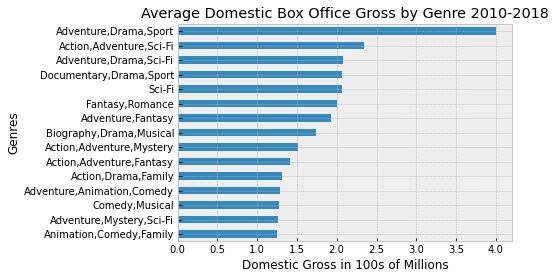

In [155]:
with plt.style.context('bmh'):
    (alljoined.groupby(['Genres'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Average Domestic Box Office Gross by Genre 2010-2018')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of Millions')

#highest grossing genre is Adventure/Drama/Sport

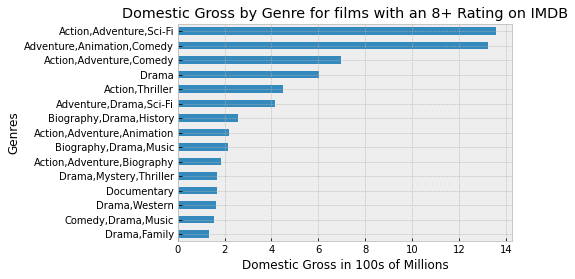

In [156]:
with plt.style.context('bmh'):
    (alljoined_8_or_better.groupby(['Genres'])['Domestic Gross'].sum().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Domestic Gross by Genre for films with an 8+ Rating on IMDB')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of Millions')

#if you care about ratings, Action, Thriller, Adventure, Sci-Fi is the way to go 

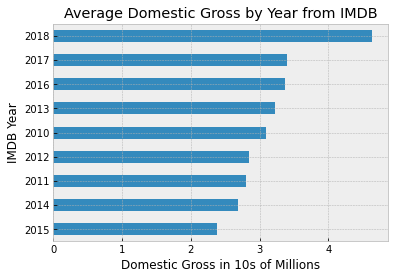

In [122]:
with plt.style.context('bmh'):
    (alljoined.groupby(['IMDB Year'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/10000000).plot(kind = 'barh')
    plt.title('Average Domestic Gross by Year from IMDB')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 10s of Millions')
    
#why 2018 so high?  

In [162]:
just2018 = alljoined[alljoined['IMDB Year'] == 2018]
just2018['Genres'].value_counts()

Drama                         23
Comedy,Drama,Romance           7
Comedy                         7
Adventure,Animation,Comedy     6
Drama,Romance                  6
                              ..
Drama,History,Sport            1
Action,Fantasy,Horror          1
Adventure,Animation,Drama      1
Comedy,Crime                   1
Fantasy,Horror,Mystery         1
Name: Genres, Length: 88, dtype: int64

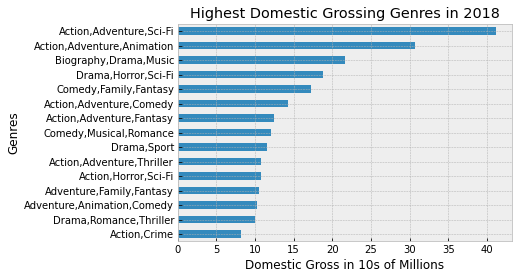

In [163]:
with plt.style.context('bmh'):
    (just2018.groupby(['Genres'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/10000000).plot(kind = 'barh')
    plt.title('Highest Domestic Grossing Genres in 2018')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 10s of Millions')
    
#action/adventure/scifi


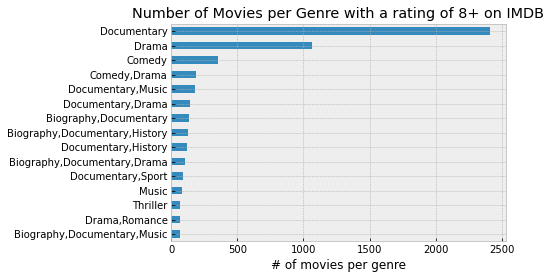

In [164]:
with plt.style.context("bmh"):
    imdb_8_or_better['Genres'].value_counts().head(15).plot(kind = 'barh')
    plt.title('Number of Movies per Genre with a rating of 8+ on IMDB')
    plt.xlabel('# of movies per genre')
    plt.gca().invert_yaxis()

#if you're after ratings and don't necessarily care about popularity or gross income
#number of votes should be considered for a better idea 
#average number of votes per genres

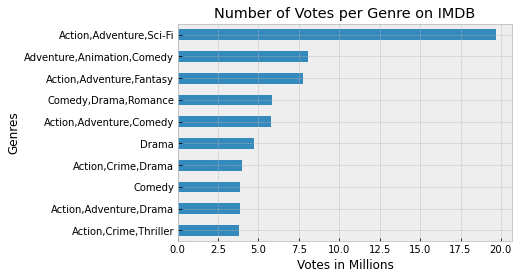

In [216]:
with plt.style.context('bmh'):
    (alljoined.groupby(['Genres'])['Number of Votes'].sum().sort_values(ascending = False).head(10)/1000000).plot(kind = 'barh')
    plt.title('Number of Votes per Genre on IMDB')
    plt.gca().invert_yaxis()
    plt.xlabel('Votes in Millions')
    
#adventure/drama/sci fi draws more feedback than any, important because of the correlation between average votes and domestic gross

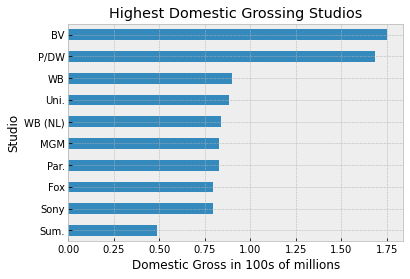

In [217]:
with plt.style.context('bmh'):
    (alljoined.groupby(['Studio'])['Domestic Gross'].mean().sort_values(ascending = False).head(10)/100000000).plot(kind = 'barh')
    plt.title('Highest Domestic Grossing Studios')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of millions')
    
#list movies from BV and P/DW

In [234]:
BVonly = alljoined[alljoined['Studio']== 'BV']
PDWonly = alljoined[alljoined['Studio']== 'P/DW']
WBonly = alljoined[alljoined['Studio']== 'WB']

Adventure,Animation,Comedy       19
Action,Adventure,Sci-Fi           9
Action,Adventure,Fantasy          7
Documentary                       5
Action,Adventure,Comedy           5
Adventure,Family,Fantasy          4
Drama                             3
Biography,Drama,Sport             3
Action,Adventure,Family           3
Comedy,Drama                      3
Comedy,Drama,Family               2
Action,Adventure,Animation        2
Adventure,Animation,Family        2
Comedy,Family                     1
Adventure,Comedy,Family           1
Thriller                          1
Fantasy,Romance                   1
Biography,Drama,Thriller          1
Adventure,Documentary             1
Biography,Drama,History           1
Comedy,Family,Fantasy             1
Biography,Drama,Family            1
Comedy,Romance                    1
Comedy,Family,Romance             1
Action,Drama,Family               1
Animation,Comedy,Family           1
Crime,Drama                       1
Drama,Romance               

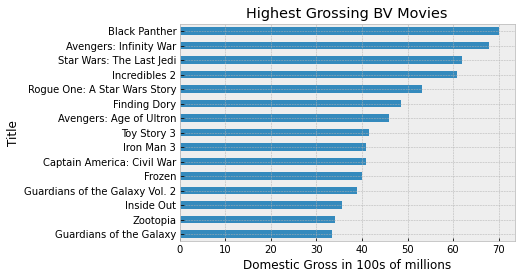

In [238]:
with plt.style.context('bmh'):
    (BVonly.groupby(['Title'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/10000000).plot(kind = 'barh')
    plt.title('Highest Grossing BV Movies')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of millions')

BVonly['Genres'].value_counts()

Action,Adventure,Animation    4
Adventure,Animation,Comedy    2
Comedy                        1
Action,Animation,Comedy       1
Comedy,Drama                  1
Action,Adventure,Sci-Fi       1
Name: Genres, dtype: int64

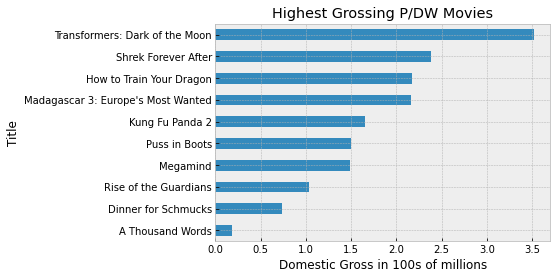

In [237]:
with plt.style.context('bmh'):
    (PDWonly.groupby(['Title'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Highest Grossing P/DW Movies')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of millions')
    
PDWonly['Genres'].value_counts() 

Action,Adventure,Fantasy      9
Action,Adventure,Sci-Fi       7
Drama                         4
Comedy,Drama,Romance          4
Adventure,Animation,Comedy    4
                             ..
Action,Adventure,Biography    1
Drama,Fantasy,Romance         1
Fantasy,Horror,Mystery        1
Action,Biography,Drama        1
Adventure,Comedy,Drama        1
Name: Genres, Length: 66, dtype: int64

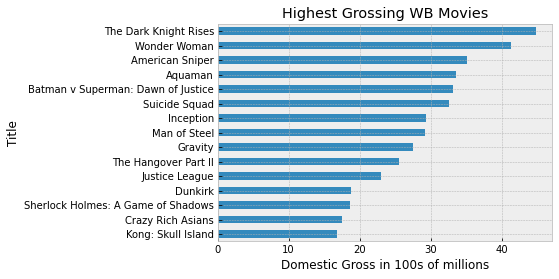

In [236]:
with plt.style.context('bmh'):
    (WBonly.groupby(['Title'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/10000000).plot(kind = 'barh')
    plt.title('Highest Grossing WB Movies')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of millions')
    
WBonly['Genres'].value_counts()

<AxesSubplot:>

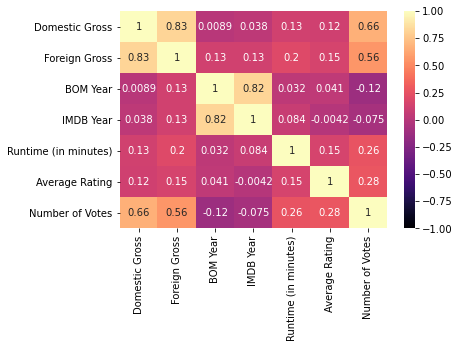

In [228]:
sns.heatmap(alljoined.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'magma')

#Notable correlations: 
#Domestic & Foreign Gross = .83 
#Num Votes & FG = .56
#Num Votes & DG = .66
#Average Rating & Num Votes = .28

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***